In [1]:
import numpy as np
import matplotlib.pyplot as plt

###1 Damped driven harmonic oscillator (40%)

In [ ]:
# a)
x0_0 = 10
x1_0 = 0
z0 = np.array([x0_0, x1_0])
dt = 0.1
Nt = 250
k = 4

In [ ]:
def step_midpoint(f,x0,y0,h):
    return y0+h*(f(x0+h/2,y0+h/2*f(x0,y0)))

In [ ]:
def f_higher(b, k):
    def f(x, z):
        return -b*z[1]-k*z[0]
    return f

def g_higher(f):
    def g(x, z):
        return np.array([z[1], f(x, z)])
    return g

In [ ]:
def integrate_mid(g, t_0, z0, dt, Nt):
    record = z0
    z = z0
    t = t_0
    for _ in range(Nt):
        t_new = t + dt
        z = step_midpoint(g, t, z, dt)
        t = t_new
        record = np.vstack((record, z))
    return record

In [ ]:
def solve(b = 0.8):
    return integrate_mid(g_higher(f_higher(b, k)), 0, z0, dt, Nt)

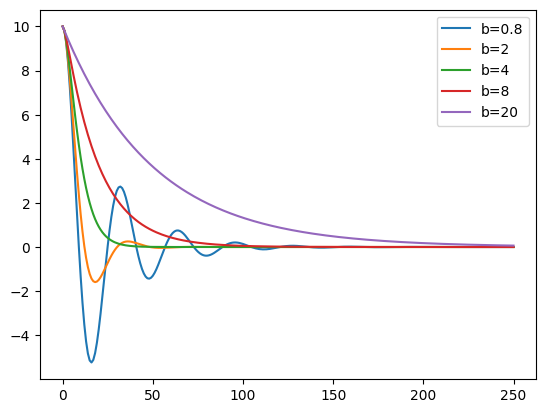

In [ ]:
# b)
for b in [0.8, 2, 4, 8, 20]:
    plt.plot(range(251), solve(b = b)[:, 0], label = f"b={b}")
plt.legend()
plt.show()

Answer:

There are 2 qualitative different behaviours. One with oscillation, one without.

The difference comes along b<4 vs b>=4. Once b>=4, there will be no "i" in the equation and no periodic pattern.

In [ ]:
# c)
def f_higher2(b, k, F0, w):
    def f(t, z):
        return -b*z[1]-k*z[0]+F0*np.cos(w*t)
    return f

In [ ]:
def solve(b = 0.8, w = 1, F0 = 4):
    return integrate_mid(g_higher(f_higher2(b, k, F0, w)), 0, z0, dt, Nt)

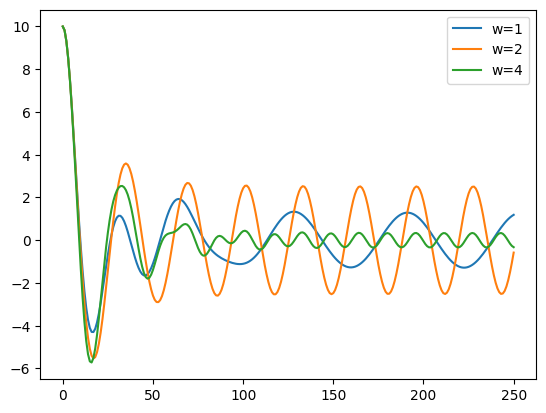

In [ ]:
# d)
for w in (1, 2, 4):
    plt.plot(range(251), solve(w = w)[:, 0], label = f"w={w}")
plt.legend()
plt.show()